In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [1]:
import json
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
weather = pd.read_csv('/content/drive/MyDrive/데이터 처리/SURFACE_ASOS_108_HR_2021_2021_2022.csv', encoding='utf-8')

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8760 non-null   int64  
 1   일시             8760 non-null   object 
 2   기온(°C)         8760 non-null   float64
 3   강수량(mm)        949 non-null    float64
 4   풍속(m/s)        8758 non-null   float64
 5   풍향(16방위)       8758 non-null   float64
 6   습도(%)          8760 non-null   int64  
 7   증기압(hPa)       8760 non-null   float64
 8   이슬점온도(°C)      8760 non-null   float64
 9   현지기압(hPa)      8760 non-null   float64
 10  해면기압(hPa)      8760 non-null   float64
 11  일조(hr)         4791 non-null   float64
 12  일사(MJ/m2)      4791 non-null   float64
 13  적설(cm)         379 non-null    float64
 14  3시간신적설(cm)     29 non-null     float64
 15  전운량(10분위)      8758 non-null   float64
 16  중하층운량(10분위)    8760 non-null   int64  
 17  운형(운형약어)       4947 non-null   object 
 18  최저운고(100

In [17]:
weather.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),적설(cm),3시간신적설(cm),전운량(10분위),중하층운량(10분위),운형(운형약어),최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,2021-01-01 0:00,-8.3,NaN,1.8,250.0,66,2.2,-13.5,1016.4,1027.7,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.8,-0.9,-0.7,0.3,1.6
1,108,2021-01-01 1:00,-8.7,NaN,2.4,270.0,68,2.2,-13.5,1016.4,1027.7,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-6.9,-1.0,-0.8,0.3,1.6
2,108,2021-01-01 2:00,-9.1,NaN,1.6,270.0,69,2.1,-13.7,1016.2,1027.5,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.1,-1.1,-0.8,0.3,1.6
3,108,2021-01-01 3:00,-9.3,NaN,1.1,250.0,70,2.1,-13.7,1016.8,1028.1,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.3,-1.2,-0.9,0.3,1.6
4,108,2021-01-01 4:00,-9.3,NaN,0.3,0.0,71,2.2,-13.5,1016.2,1027.5,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,2000,NaN,NaN,-7.5,-1.3,-1.0,0.2,1.5


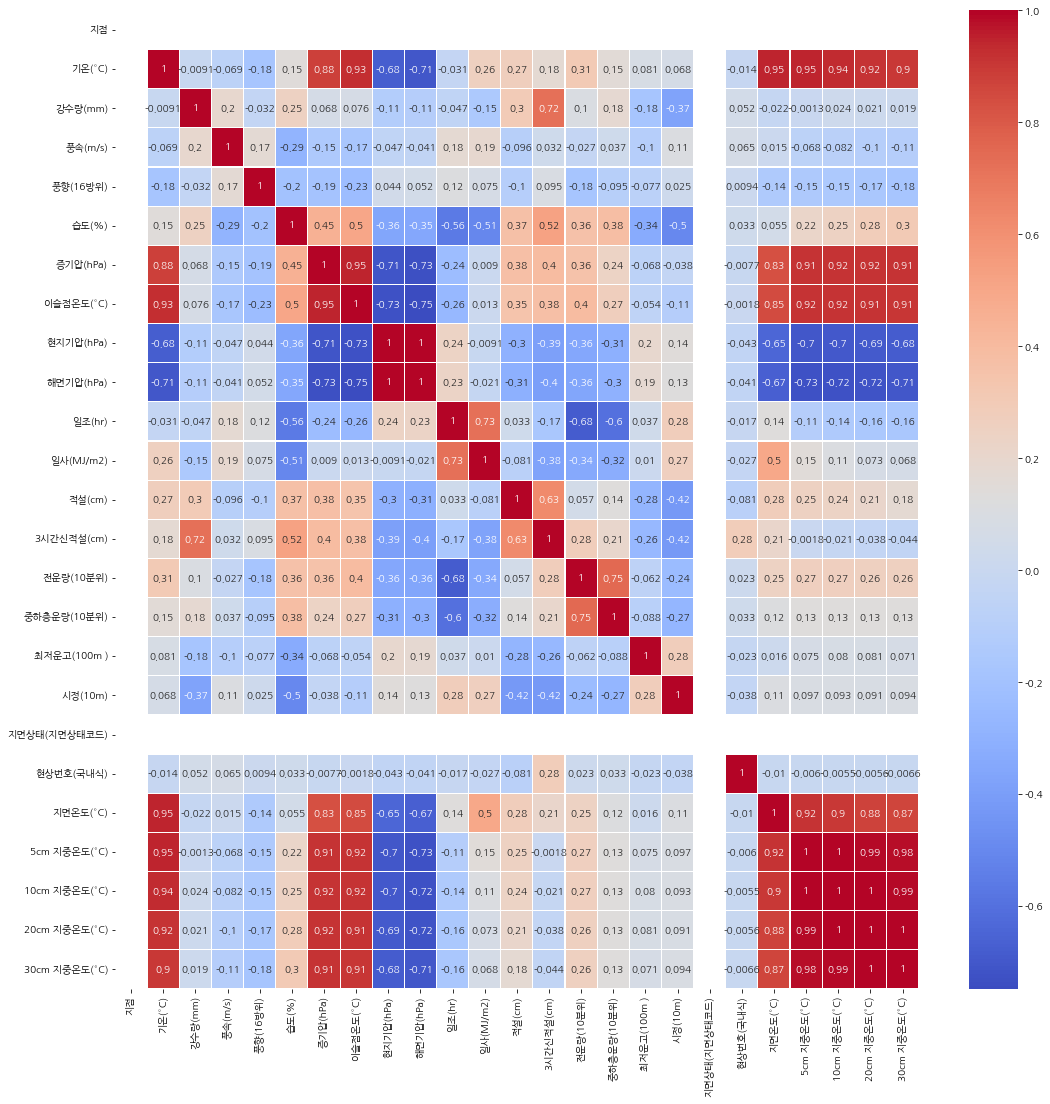

In [18]:
data_corr = weather.corr()
plt.figure(figsize=(18,18))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [19]:
weather.drop(columns=['풍향(16방위)'], inplace=True)
weather.drop(columns=['증기압(hPa)'], inplace=True)
weather.drop(columns=['이슬점온도(°C)'], inplace=True)
weather.drop(columns=['현지기압(hPa)'], inplace=True)
weather.drop(columns=['해면기압(hPa)'], inplace=True)
weather.drop(columns=['일조(hr)'], inplace=True)
weather.drop(columns=['일사(MJ/m2)'], inplace=True)
weather.drop(columns=['적설(cm)'], inplace=True)
weather.drop(columns=['3시간신적설(cm)'], inplace=True)
weather.drop(columns=['전운량(10분위)'], inplace=True)
weather.drop(columns=['중하층운량(10분위)'], inplace=True)
weather.drop(columns=['운형(운형약어)'], inplace=True)
weather.drop(columns=['최저운고(100m )'], inplace=True)
weather.drop(columns=['시정(10m)'], inplace=True)
weather.drop(columns=['지면상태(지면상태코드)'], inplace=True)
weather.drop(columns=['현상번호(국내식)'], inplace=True)
weather.drop(columns=['지면온도(°C)'], inplace=True)
weather.drop(columns=['5cm 지중온도(°C)'], inplace=True)
weather.drop(columns=['10cm 지중온도(°C)'], inplace=True)
weather.drop(columns=['20cm 지중온도(°C)'], inplace=True)
weather.drop(columns=['30cm 지중온도(°C)'], inplace=True)

In [20]:
weather.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,2021-01-01 0:00,-8.3,NaN,1.8,66
1,108,2021-01-01 1:00,-8.7,NaN,2.4,68
2,108,2021-01-01 2:00,-9.1,NaN,1.6,69
3,108,2021-01-01 3:00,-9.3,NaN,1.1,70
4,108,2021-01-01 4:00,-9.3,NaN,0.3,71


In [9]:
#weather1 = pd.read_csv('/content/drive/MyDrive/데이터 처리/SURFACE_ASOS_108_HR_2021_2021_2022_1.csv', encoding='utf-8')

In [10]:
#weather1.head()

,지점,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,2021-01-01 0:00,-8.3,NaN,1.8,66
1,108,2021-01-01 1:00,-8.7,NaN,2.4,68
2,108,2021-01-01 2:00,-9.1,NaN,1.6,69
3,108,2021-01-01 3:00,-9.3,NaN,1.1,70
4,108,2021-01-01 4:00,-9.3,NaN,0.3,71
